<a href="https://colab.research.google.com/github/labeconometria/prueba_2/blob/main/CSV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as open
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Copia de Casos_positivos_de_COVID-19_en_Colombia.csv')
print(df.head())


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0  23/11/2020 0:00:00,"1,249,098",21/11/2020 0:00...                                                                                                                                                                                                                                                                                                                                                                                
1  23/11/2020 0:00:00,"1,250,229",22/11/2020 0:00...                                                                                                          

In [ ]:
base.head()


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [ ]:
base[base['Fecha de diagnóstico'] == '23/11/2021 0:00:00']

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico


# Nueva sección

In [ ]:
base.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [ ]:
noviembre_23 = base[cont['Fecha de diagnóstico'] == '23/11/2021 0:00:00'].index
base2 = cont.drop(nov_23)
base2

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460564,22/11/2021 0:00:00,"5,050,286",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,3,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,18/11/2021 0:00:00,NaN,19/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460565,22/11/2021 0:00:00,"5,050,290",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,37,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,20/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460566,22/11/2021 0:00:00,"5,050,291",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,32,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,20/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460567,22/11/2021 0:00:00,"5,050,292",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,15,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,20/11/2021 0:00:00,NaN,NaN,NaN,NaN


In [ ]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460569 entries, 0 to 1460568
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             1460569 non-null  object 
 1   ID de caso                    1460569 non-null  object 
 2   Fecha de notificación         1460569 non-null  object 
 3   Código DIVIPOLA departamento  1460569 non-null  int64  
 4   Nombre departamento           1460569 non-null  object 
 5   Código DIVIPOLA municipio     1460569 non-null  object 
 6   Nombre municipio              1460569 non-null  object 
 7   Edad                          1460569 non-null  int64  
 8   Unidad de medida de edad      1460569 non-null  int64  
 9   Sexo                          1460569 non-null  object 
 10  Tipo de contagio              1460569 non-null  object 
 11  Ubicación del caso            1455765 non-null  object 
 12  Estado                      

In [ ]:
base2["Edad"].describe()

count    1.460569e+06
mean     3.856712e+01
std      1.765338e+01
min      1.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      5.100000e+01
max      1.140000e+02
Name: Edad, dtype: float64

In [ ]:
base2["Nombre del país"].value_counts()  

ESTADOS UNIDOS DE AMÉRICA                          350
ESPAÑA                                             123
MÉXICO                                             110
REPÚBLICA DOMINICANA                                33
ECUADOR                                             31
PANAMÁ                                              31
BRASIL                                              29
CHILE                                               25
FRANCIA                                             17
TURQUÍA                                             17
EL SALVADOR                                         14
REINO UNIDO DE GRAN BRETAÑA E IRLANDA DEL NORTE     12
EGIPTO                                              12
PERÚ                                                11
ARGENTINA                                           11
PUERTO RICO                                         10
PANAMA                                               8
ITALIA                                               8
ALEMANIA  

Se observa que durante el periodo de estudio en los casos que fueron importados el país de mayor participación fue Estados Unidos. 

In [ ]:
base2["Sexo"].value_counts()

F    780729
M    679829
m         6
f         5
Name: Sexo, dtype: int64

Se observa que en el sexo femenino tienen una mayor frecuencia de covid

<BarContainer object of 2 artists>

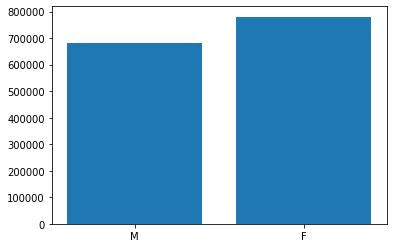

In [ ]:
plt.bar(["M","F"],[679829,780729])

In [ ]:
base2["Ubicación del caso"].value_counts()

Casa            1427285
Fallecido         27718
casa                558
Hospital            111
Hospital UCI         93
Name: Ubicación del caso, dtype: int64

Se observa que los casos durante el periodo se observa que la mayoria se encuentra en cuarentena en su casa. 

In [ ]:
base2["Estado"].value_counts()

Leve         1427024
Fallecido      27718
leve             819
Moderado         111
Grave             93
Name: Estado, dtype: int64

Se puede ver que el etsado lev es de mayor frecuencia, lo cual indica que el cuidado se debe realizar en el hogar. 

In [ ]:
base2["Tipo de contagio"].value_counts()

En estudio     708003
Relacionado    527806
Comunitaria    223821
Importado         939
Name: Tipo de contagio, dtype: int64

Se puede ver que el la mayoria de casos se encuentra en estudio, lo cual es dificil determinar las diferentes causas pora las cuales se pudo establecer el contagio. 

In [ ]:
base2["Nombre del país"].describe()

count                           939
unique                           46
top       ESTADOS UNIDOS DE AMÉRICA
freq                            350
Name: Nombre del país, dtype: object

In [ ]:
base2["Fecha de muerte"].value_counts()

15/6/2021 0:00:00     207
12/6/2021 0:00:00     206
14/6/2021 0:00:00     202
11/6/2021 0:00:00     195
21/6/2021 0:00:00     193
                     ... 
22/4/2020 0:00:00       1
17/4/2020 0:00:00       1
30/3/2020 0:00:00       1
1/4/2020 0:00:00        1
22/11/2021 0:00:00      1
Name: Fecha de muerte, Length: 606, dtype: int64

In [88]:
base2["Fecha de muerte"].value_counts()

15/6/2021 0:00:00     207
12/6/2021 0:00:00     206
14/6/2021 0:00:00     202
11/6/2021 0:00:00     195
21/6/2021 0:00:00     193
                     ... 
22/4/2020 0:00:00       1
17/4/2020 0:00:00       1
30/3/2020 0:00:00       1
1/4/2020 0:00:00        1
22/11/2021 0:00:00      1
Name: Fecha de muerte, Length: 606, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


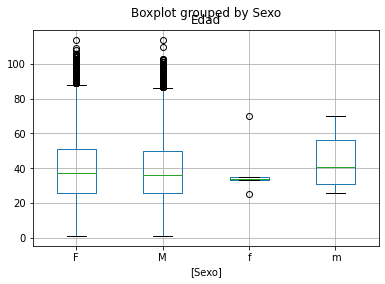

In [89]:
base2[['Edad','Sexo']].boxplot(by='Sexo')


Se observa que se presentan datos atipicos en la base de datos. 

In [95]:
base2['Fecha de diagnóstico']=base2['Fecha de diagnóstico'].str[:-7]
base2.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,31/3/2020 0:00:00,PCR,6.0,NaN


In [96]:
base2.insert(19,'x',np.ones(base2.shape[0]))
base2

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,x,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020,1.0,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020,1.0,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020,1.0,31/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460564,22/11/2021 0:00:00,"5,050,286",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,3,1,M,En estudio,Hospital,Moderado,NaN,NaN,Activo,18/11/2021 0:00:00,NaN,19/11/2021,1.0,NaN,NaN,NaN,NaN
1460565,22/11/2021 0:00:00,"5,050,290",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,37,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,20/11/2021,1.0,NaN,NaN,NaN,NaN
1460566,22/11/2021 0:00:00,"5,050,291",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,32,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,20/11/2021,1.0,NaN,NaN,NaN,NaN
1460567,22/11/2021 0:00:00,"5,050,292",19/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,15,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,20/11/2021,1.0,NaN,NaN,NaN,NaN


In [99]:
model = base2[['Fecha de diagnóstico','x']]
model

,Fecha de diagnóstico,x
0,6/3/2020,1.0
1,11/3/2020,1.0
2,11/3/2020,1.0
3,12/3/2020,1.0
4,12/3/2020,1.0
...,...,...
1460564,19/11/2021,1.0
1460565,20/11/2021,1.0
1460566,20/11/2021,1.0
1460567,20/11/2021,1.0


In [104]:
model['Fecha de diagnóstico'] = pd.to_datetime(model['Fecha de diagnóstico'],dayfirst = True) 
model = mod.set_index('Fecha de diagnóstico')
model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x
Fecha de diagnóstico,
6/3/2020,1.0
11/3/2020,1.0
11/3/2020,1.0
12/3/2020,1.0
12/3/2020,1.0
...,...
19/11/2021,1.0
20/11/2021,1.0
20/11/2021,1.0


In [105]:
model = mod.rename(columns={'x': 'y'})

In [107]:
model = mod.resample('D').sum()
model

TypeError: ignored

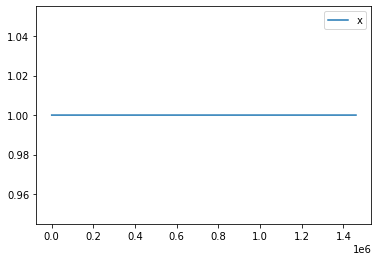

In [108]:
mod.plot()  ####### no me dio los resultados esperados :(